### **Assignment 2**

### **split data**

In [1]:
!pip install mlxtend



import math
import pandas as pd
import numpy as np
from operator import itemgetter


import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression

from sklearn.linear_model import LinearRegression

from sklearn import tree
from sklearn.tree import _tree

from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import RandomForestClassifier 

from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.ensemble import GradientBoostingClassifier 

from sklearn.metrics import classification_report, confusion_matrix

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [2]:
cleandf01 = pd.read_csv("cleandf01")
FLAG = "TARGET_BAD_FLAG"
LOSS = "TARGET_LOSS_AMT"

In [3]:
X = cleandf01.copy()
X = X.drop( FLAG, axis=1 )
X = X.drop( LOSS, axis=1 )

Y = cleandf01[ [FLAG, LOSS] ]

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2 )

print( "FLAG DATA" )
print( "TRAINING = ", X_train.shape )
print( "TEST = ", X_test.shape )

FLAG DATA
TRAINING =  (4768, 28)
TEST =  (1192, 28)


In [5]:
F = ~ Y_train[ LOSS ].isna()
W_train = X_train[F].copy()
Z_train = Y_train[F].copy()

F = ~ Y_test[ LOSS ].isna()
W_test = X_test[F].copy()
Z_test = Y_test[F].copy()

print( Z_train.describe() )
print( Z_test.describe() )
print( "\n\n")

F = Z_train[ LOSS ] > 25000
Z_train.loc[ F, LOSS ] = 25000

F = Z_test[ LOSS ] > 25000
Z_test.loc[ F, [LOSS] ] = 25000

print( Z_train.describe() )
print( Z_test.describe() )
print( "\n\n")

       TARGET_BAD_FLAG  TARGET_LOSS_AMT
count      4768.000000      4768.000000
mean          0.196518      5045.783767
std           0.397407      6187.405907
min           0.000000       320.000000
25%           0.000000      3080.000000
50%           0.000000      3080.000000
75%           0.000000      3080.000000
max           1.000000     78987.000000
       TARGET_BAD_FLAG  TARGET_LOSS_AMT
count      1192.000000      1192.000000
mean          0.211409      5525.432047
std           0.408479      7009.580591
min           0.000000       224.000000
25%           0.000000      3080.000000
50%           0.000000      3080.000000
75%           0.000000      3080.000000
max           1.000000     63512.000000



       TARGET_BAD_FLAG  TARGET_LOSS_AMT
count      4768.000000      4768.000000
mean          0.196518      4806.189597
std           0.397407      4828.344734
min           0.000000       320.000000
25%           0.000000      3080.000000
50%           0.000000      3080.0000

### **decision tree**



DECISION TREE

Probability of Default
Accuracy Train: 0.9018456375838926
Accuracy Test: 0.8825503355704698




C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Anaconda\Lib\site-packages

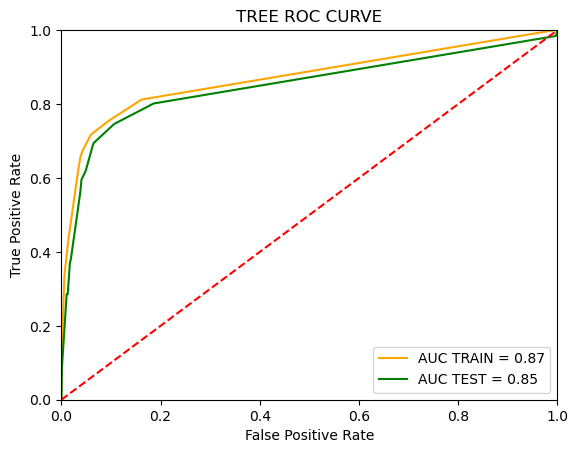

In [6]:
fm01_Tree = tree.DecisionTreeClassifier( max_depth=5 )
fm01_Tree = fm01_Tree.fit( X_train, Y_train[ FLAG ] )

Y_Pred_train = fm01_Tree.predict(X_train)
Y_Pred_test = fm01_Tree.predict(X_test)

print("\n=============\n")
print("DECISION TREE\n")
print("Probability of Default")
print("Accuracy Train:",metrics.accuracy_score(Y_train[FLAG], Y_Pred_train))
print("Accuracy Test:",metrics.accuracy_score(Y_test[FLAG], Y_Pred_test))
print("\n")

probs = fm01_Tree.predict_proba(X_train)
p1 = probs[:,1]
fpr_train, tpr_train, threshold = metrics.roc_curve( Y_train[FLAG], p1)
roc_auc_train = metrics.auc(fpr_train, tpr_train)

probs = fm01_Tree.predict_proba(X_test)
p1 = probs[:,1]
fpr_test, tpr_test, threshold = metrics.roc_curve( Y_test[FLAG], p1)
roc_auc_test = metrics.auc(fpr_test, tpr_test)

fpr_tree = fpr_test
tpr_tree = tpr_test
auc_tree = roc_auc_test


plt.title('TREE ROC CURVE')
plt.plot(fpr_train, tpr_train, label = 'AUC TRAIN = %0.2f' % roc_auc_train, color="orange")
plt.plot(fpr_test, tpr_test, label = 'AUC TEST = %0.2f' % roc_auc_test, color="green")
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [7]:
feature_cols = list(X.columns.values )
tree.export_graphviz(fm01_Tree,out_file='tree_1.txt',filled=True, rounded=True, feature_names = feature_cols, impurity=False, class_names=["Good","Bad"]  )

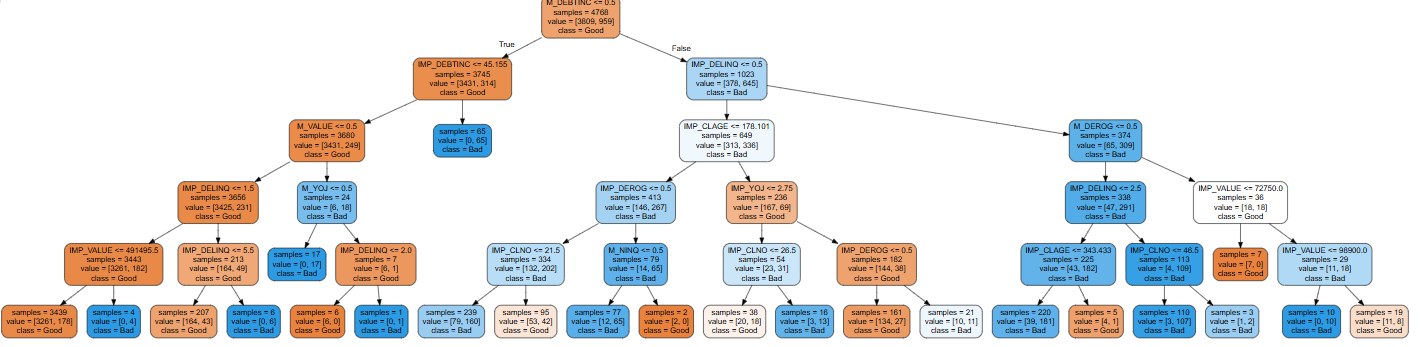

In [8]:
def getTreeVars( TREE, varNames ) :
   tree_ = TREE.tree_
   varName = [ varNames[i] if i != _tree.TREE_UNDEFINED else "undefined!" for i in tree_.feature ]

   nameSet = set()
   for i in tree_.feature :
       if i != _tree.TREE_UNDEFINED :
           nameSet.add( i )
   nameList = list( nameSet )
   parameter_list = list()
   for i in nameList :
       parameter_list.append( varNames[i] )
   return parameter_list

vars_tree_flag = getTreeVars (fm01_Tree, feature_cols)

print("Important features for loan default prediction:")
for i in vars_tree_flag: 
    print(i)

Important features for loan default prediction:
Unnamed: 0
OHE_REASON_MISSING
IMP_MORTDUE
M_VALUE
IMP_VALUE
M_YOJ
IMP_YOJ
M_DEROG
IMP_DEROG
IMP_DELINQ
IMP_CLAGE
M_NINQ
IMP_NINQ
IMP_CLNO
M_DEBTINC
IMP_DEBTINC


In [9]:
loss_m01_Tree = tree.DecisionTreeRegressor( max_depth= 4 )
loss_m01_Tree = loss_m01_Tree.fit( W_train, Z_train[LOSS] )

Z_Pred_train = loss_m01_Tree.predict(W_train)
Z_Pred_test = loss_m01_Tree.predict(W_test)

print("\n=============\n")
print("DECISION TREE\n")
print("Predicted Accuracy of Loss Amount")
print("Accuracy Train:",metrics.accuracy_score(Y_train[LOSS], Y_Pred_train))
print("Accuracy Test:",metrics.accuracy_score(Y_test[LOSS], Y_Pred_test))
print("\n")

RMSE_TRAIN = math.sqrt( metrics.mean_squared_error(Z_train[LOSS], Z_Pred_train))
RMSE_TEST = math.sqrt( metrics.mean_squared_error(Z_test[LOSS], Z_Pred_test))

print("TREE RMSE Train:", RMSE_TRAIN )
print("TREE RMSE Test:", RMSE_TEST )

RMSE_TREE = RMSE_TEST

feature_cols = list( X.columns.values )
vars_tree_amt = getTreeVars( loss_m01_Tree, feature_cols ) 
tree.export_graphviz(loss_m01_Tree,out_file='tree_a.txt',filled=True, rounded=True, feature_names = feature_cols, impurity=False, precision=0  )

print("\n")
for i in vars_tree_amt :
   print(i)



DECISION TREE

Predicted Accuracy of Loss Amount
Accuracy Train: 0.0
Accuracy Test: 0.0


TREE RMSE Train: 3152.359052141955
TREE RMSE Test: 3897.663736539515


Unnamed: 0
M_VALUE
IMP_YOJ
IMP_DELINQ
M_DEBTINC
IMP_DEBTINC


C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Anaconda\Lib\site-packages

In [10]:
feature_cols = list(X.columns.values )
tree.export_graphviz(loss_m01_Tree,out_file='tree_2.txt',filled=True, rounded=True, feature_names = feature_cols, impurity=False, class_names=["Good","Bad"]  )

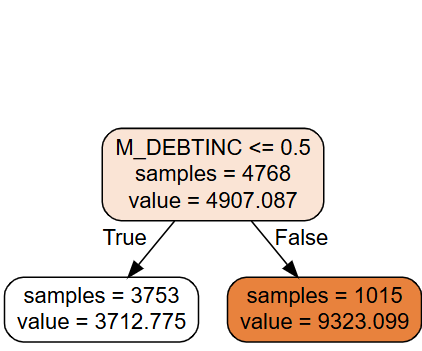

### **Random Forest**

In [11]:
fm01_RF = RandomForestClassifier( n_estimators = 100, random_state=1 )
fm01_RF = fm01_RF.fit( X_train, Y_train[ FLAG] )

Y_Pred_train = fm01_RF.predict(X_train)
Y_Pred_test = fm01_RF.predict(X_test)


print("\n=============\n")
print("RANDOM FOREST\n")
print("Probability of default")
print("Accuracy Train:",metrics.accuracy_score(Y_train[FLAG], Y_Pred_train))
print("Accuracy Test:",metrics.accuracy_score(Y_test[FLAG], Y_Pred_test))
print("\n")

C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Anaconda\Lib\site-packages



RANDOM FOREST

Probability of default
Accuracy Train: 1.0
Accuracy Test: 0.9219798657718121




C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.appl

C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Anaconda\Lib\site-packages

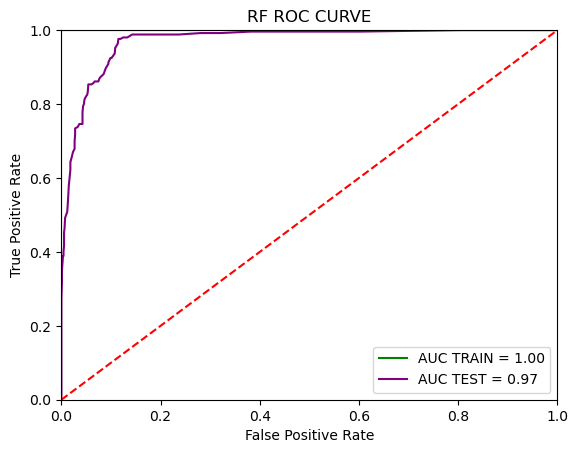

In [12]:
probs = fm01_RF.predict_proba(X_train)
p1 = probs[:,1]
fpr_train, tpr_train, threshold = metrics.roc_curve( Y_train[FLAG], p1)
roc_auc_train = metrics.auc(fpr_train, tpr_train)

probs = fm01_RF.predict_proba(X_test)
p1 = probs[:,1]
fpr_test, tpr_test, threshold = metrics.roc_curve( Y_test[FLAG], p1)
roc_auc_test = metrics.auc(fpr_test, tpr_test)

fpr_RF = fpr_test
tpr_RF = tpr_test
auc_RF = roc_auc_test


# %%
plt.title('RF ROC CURVE')
plt.plot(fpr_train, tpr_train, label = 'AUC TRAIN = %0.2f' % roc_auc_train, color="green")
plt.plot(fpr_test, tpr_test, label = 'AUC TEST = %0.2f' % roc_auc_test, color="purple")
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [13]:
def getEnsembleTreeVars( ENSTREE, varNames ) :
   importance = ENSTREE.feature_importances_
   index = np.argsort(importance)
   theList = []
   for i in index :
       imp_val = importance[i]
       if imp_val > np.average( ENSTREE.feature_importances_ ) :
           v = int( imp_val / np.max( ENSTREE.feature_importances_ ) * 100 )
           theList.append( ( varNames[i], v ) )
   theList = sorted(theList,key=itemgetter(1),reverse=True)
   return theList


feature_cols = list( X.columns.values )
vars_RF_flag = getEnsembleTreeVars( fm01_RF, feature_cols )

for i in vars_RF_flag :
   print( i )

('M_DEBTINC', 100)
('IMP_DEBTINC', 71)
('IMP_CLAGE', 44)
('IMP_DELINQ', 42)
('IMP_VALUE', 36)
('Unnamed: 0', 36)
('IMP_CLNO', 34)
('IMP_MORTDUE', 33)
('LOAN', 31)
('IMP_YOJ', 29)
('IMP_DEROG', 21)


In [14]:
loss_m01_RF = RandomForestRegressor(n_estimators = 100, random_state=1)
loss_m01_RF = loss_m01_RF.fit( W_train, Z_train[LOSS] )

L_Pred_train = loss_m01_RF.predict(W_train)
L_Pred_test = loss_m01_RF.predict(W_test)

RMSE_TRAIN = math.sqrt( metrics.mean_squared_error(Z_train[LOSS], L_Pred_train))
RMSE_TEST = math.sqrt( metrics.mean_squared_error(Z_test[LOSS], L_Pred_test))

print("RF RMSE Train:", RMSE_TRAIN )
print("RF RMSE Test:", RMSE_TEST )

RMSE_RF = RMSE_TEST

feature_cols = list( X.columns.values )
vars_RF_amt = getEnsembleTreeVars( loss_m01_RF, feature_cols )

for i in vars_RF_amt :
   print( i )


C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Anaconda\Lib\site-packages

RF RMSE Train: 1088.349533081416
RF RMSE Test: 3028.8246823918666
('Unnamed: 0', 100)
('M_DEBTINC', 88)
('IMP_DELINQ', 42)
('IMP_DEBTINC', 36)
('IMP_CLAGE', 27)
('IMP_CLNO', 21)
('LOAN', 18)
('IMP_YOJ', 17)
('IMP_VALUE', 16)


### **Gradient Boosting**

In [15]:
fm01_GB = GradientBoostingClassifier( random_state=1 )
fm01_GB = fm01_GB.fit( X_train, Y_train[ FLAG ] )

Y_Pred_train = fm01_GB.predict(X_train)
Y_Pred_test = fm01_GB.predict(X_test)

print("\n=============\n")
print("GRADIENT BOOSTING\n")
print("Probability of default")
print("Accuracy Train:",metrics.accuracy_score(Y_train[FLAG], Y_Pred_train))
print("Accuracy Test:",metrics.accuracy_score(Y_test[FLAG], Y_Pred_test))
print("\n")

C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Anaconda\Lib\site-packages



GRADIENT BOOSTING

Probability of default
Accuracy Train: 0.9238674496644296
Accuracy Test: 0.9043624161073825




C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.appl

C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Anaconda\Lib\site-packages

('M_DEBTINC', 100)
('IMP_DEBTINC', 28)
('IMP_DELINQ', 19)
('IMP_CLAGE', 13)
('M_VALUE', 8)


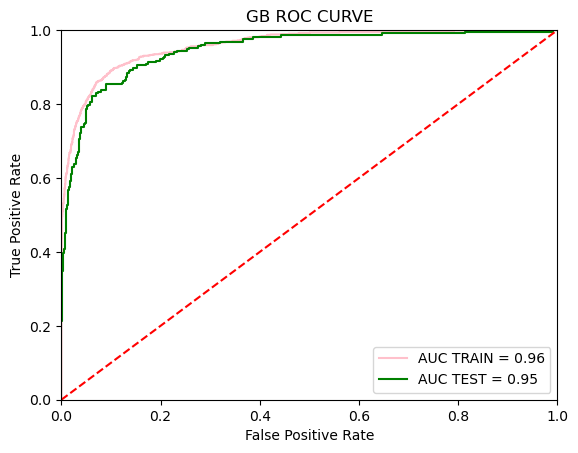

In [16]:
probs = fm01_GB.predict_proba(X_train)
p1 = probs[:,1]
fpr_train, tpr_train, threshold = metrics.roc_curve( Y_train[FLAG], p1)
roc_auc_train = metrics.auc(fpr_train, tpr_train)

probs = fm01_GB.predict_proba(X_test)
p1 = probs[:,1]
fpr_test, tpr_test, threshold = metrics.roc_curve( Y_test[FLAG], p1)
roc_auc_test = metrics.auc(fpr_test, tpr_test)

fpr_GB = fpr_test
tpr_GB = tpr_test
auc_GB = roc_auc_test


feature_cols = list( X.columns.values )
vars_GB_flag = getEnsembleTreeVars( fm01_GB, feature_cols )


for i in vars_GB_flag :
   print(i)



plt.title('GB ROC CURVE')
plt.plot(fpr_train, tpr_train, label = 'AUC TRAIN = %0.2f' % roc_auc_train, color="PINK")
plt.plot(fpr_test, tpr_test, label = 'AUC TEST = %0.2f' % roc_auc_test, color="GREEN")
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [17]:
#loss amount
loss_m01_GB = GradientBoostingRegressor(random_state=1)
loss_m01_GB = loss_m01_GB.fit( W_train, Z_train[LOSS] )

Z_Pred_train = loss_m01_GB.predict(W_train)
Z_Pred_test = loss_m01_GB.predict(W_test)

RMSE_TRAIN = math.sqrt( metrics.mean_squared_error(Z_train[LOSS], Z_Pred_train))
RMSE_TEST = math.sqrt( metrics.mean_squared_error(Z_test[LOSS], Z_Pred_test))

print("GB RMSE Train:", RMSE_TRAIN )
print("GB RMSE Test:", RMSE_TEST )

RMSE_GB = RMSE_TEST

feature_cols = list( X.columns.values )
vars_GB_amt = getEnsembleTreeVars( loss_m01_GB, feature_cols )


for i in vars_GB_amt :
   print(i)

C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Anaconda\Lib\site-packages

GB RMSE Train: 2459.2177229508015
GB RMSE Test: 3077.494290676056
('M_DEBTINC', 100)
('Unnamed: 0', 96)
('IMP_DELINQ', 49)
('IMP_DEBTINC', 35)
('IMP_CLAGE', 14)


C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.appl

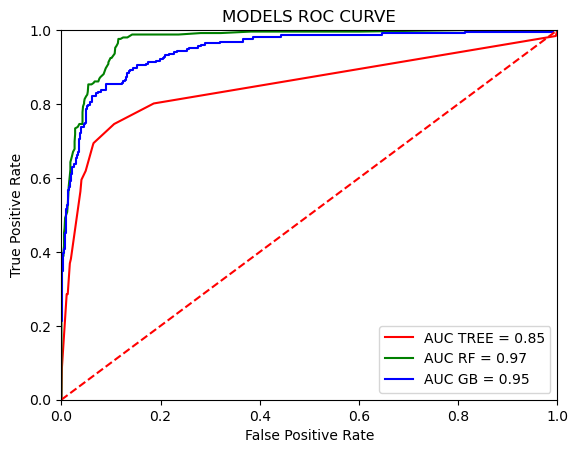

Root Mean Square Average For Damages
TREE 3897.663736539515
RF 3028.8246823918666
GB 3077.494290676056


In [18]:
plt.title('MODELS ROC CURVE')
plt.plot(fpr_tree, tpr_tree, label = 'AUC TREE = %0.2f' % auc_tree, color="red")
plt.plot(fpr_RF, tpr_RF, label = 'AUC RF = %0.2f' % auc_RF, color="green")
plt.plot(fpr_GB, tpr_GB, label = 'AUC GB = %0.2f' % auc_GB, color="blue")
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



print("Root Mean Square Average For Damages")
print("TREE", RMSE_TREE)
print("RF", RMSE_RF)
print("GB", RMSE_GB)

Unnamed: 0
LOAN
OHE_REASON_HOMEIMP
OHE_REASON_DEBTCON
OHE_REASON_MISSING
OHE_JOB_OFFICE
OHE_JOB_OTHER
OHE_JOB_MGR
OHE_JOB_PROFEXEC
OHE_JOB_SALES
M_MORTDUE
IMP_MORTDUE
M_VALUE
IMP_VALUE
M_YOJ
IMP_YOJ
M_DEROG
IMP_DEROG
M_DELINQ
IMP_DELINQ
M_CLAGE
IMP_CLAGE
M_NINQ
IMP_NINQ
M_CLNO
IMP_CLNO
M_DEBTINC
IMP_DEBTINC
 number 
 ----- 
count    5960.000000
mean     2979.500000
std      1720.648134
min         0.000000
25%      1489.750000
50%      2979.500000
75%      4469.250000
max      5959.000000
Name: Unnamed: 0, dtype: float64
 -------
 
count     5960.000000
mean     18607.969799
std      11207.480417
min       1100.000000
25%      11100.000000
50%      16300.000000
75%      23300.000000
max      89900.000000
Name: LOAN, dtype: float64
 -------
 
count    5960.000000
mean        0.298658
std         0.457708
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: OHE_REASON_HOMEIMP, dtype: float64
 -------
 
count    5960.000000
mean   

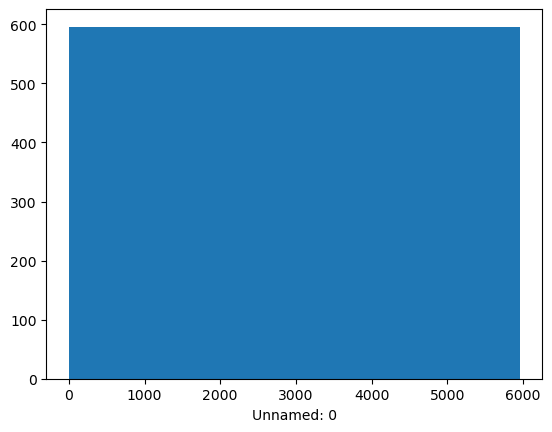

LOAN


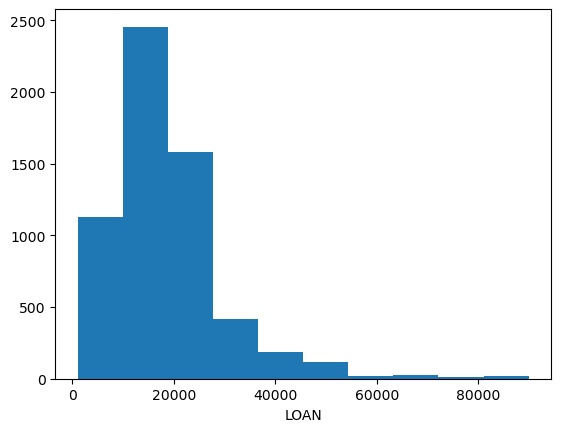

OHE_REASON_HOMEIMP


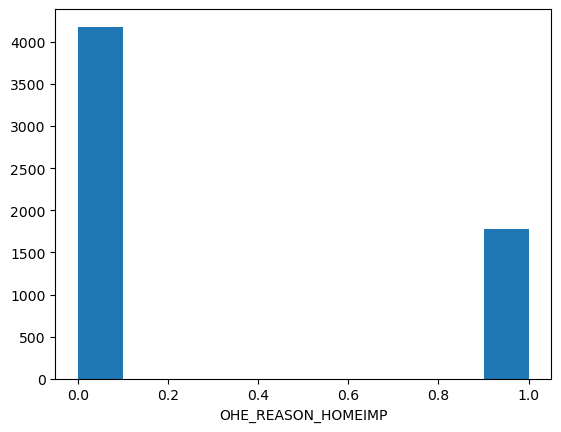

OHE_REASON_DEBTCON


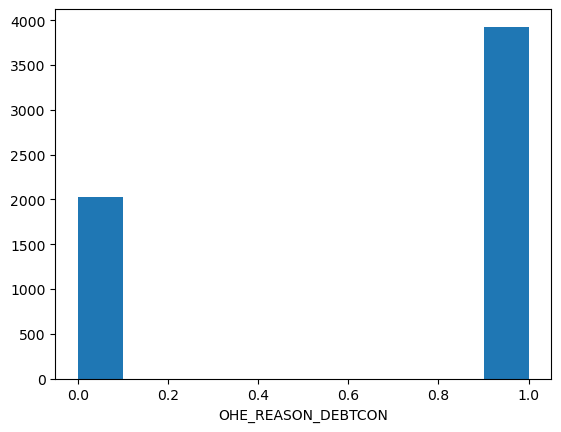

OHE_REASON_MISSING


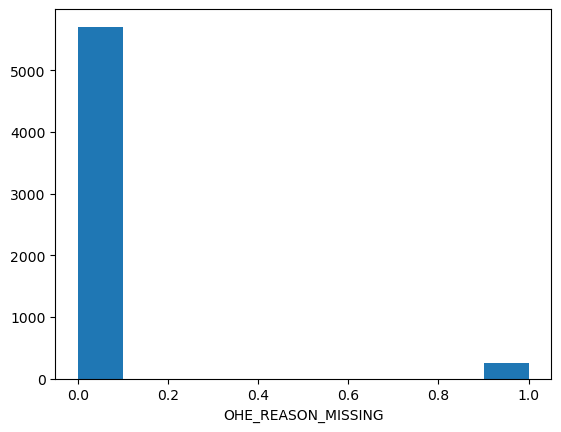

OHE_JOB_OFFICE


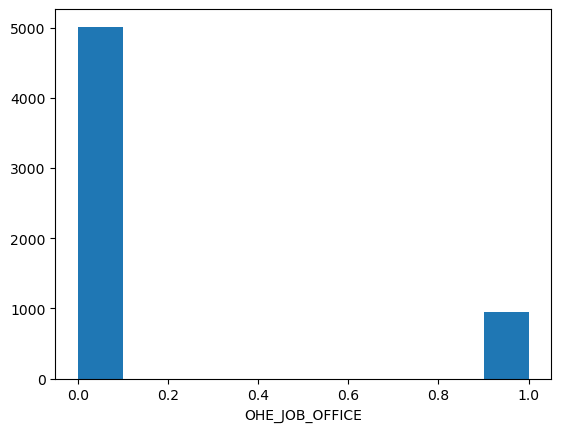

OHE_JOB_OTHER


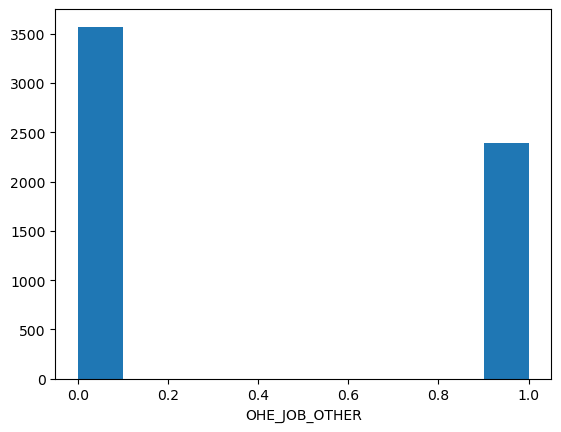

OHE_JOB_MGR


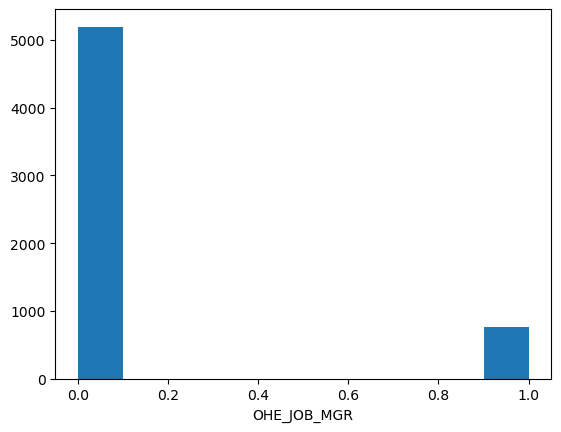

OHE_JOB_PROFEXEC


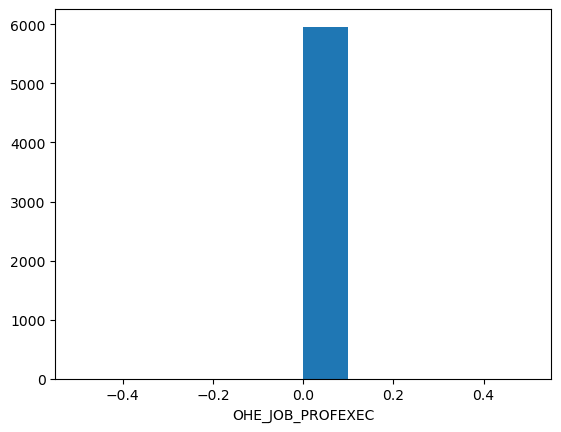

OHE_JOB_SALES


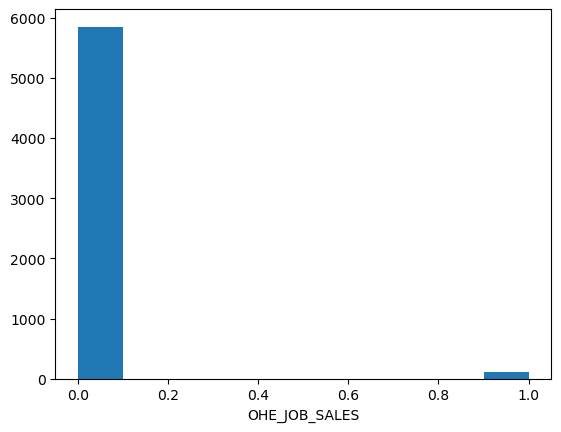

M_MORTDUE


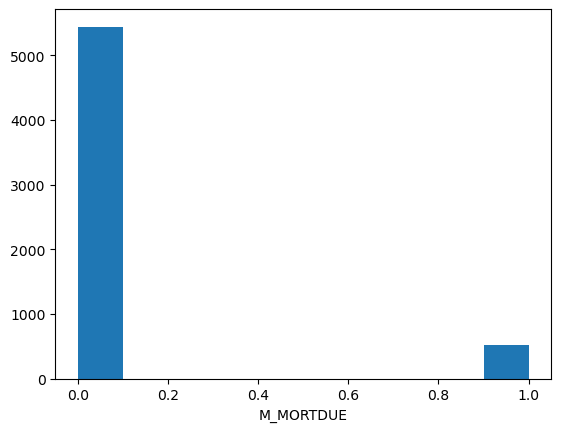

IMP_MORTDUE


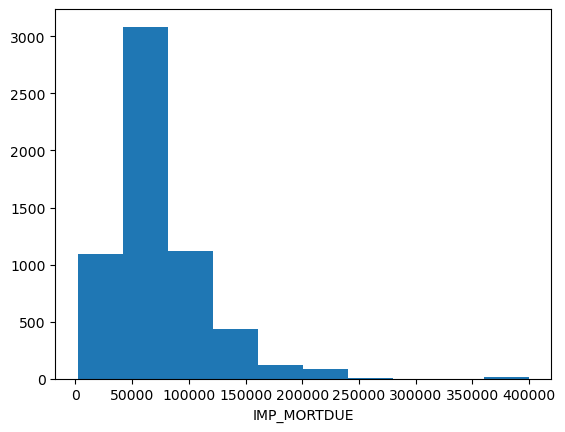

M_VALUE


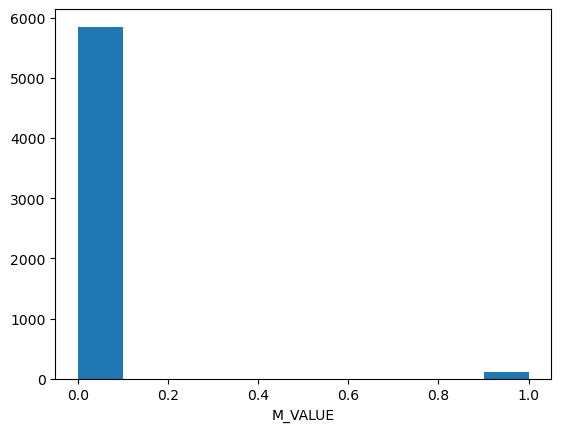

IMP_VALUE


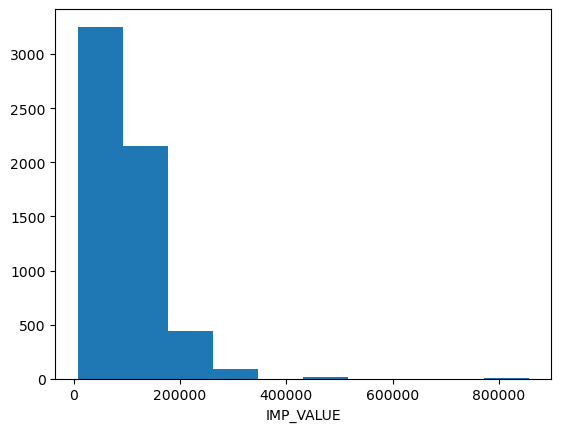

M_YOJ


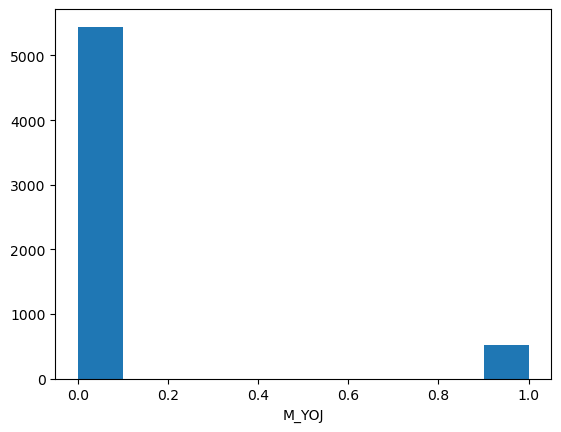

IMP_YOJ


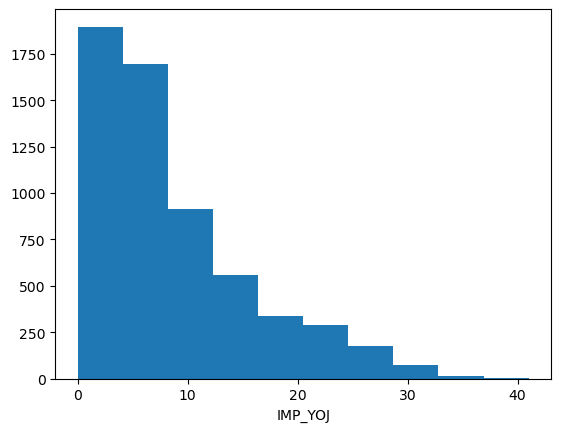

M_DEROG


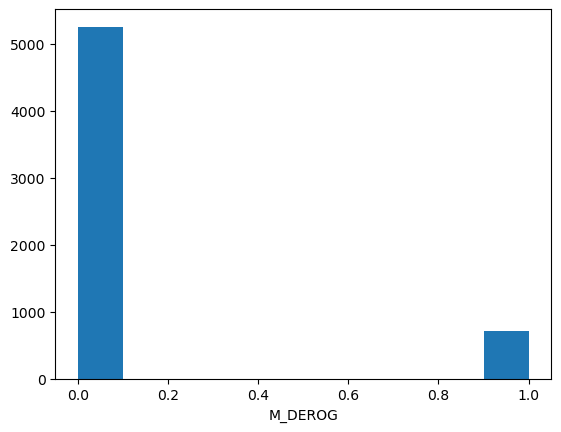

IMP_DEROG


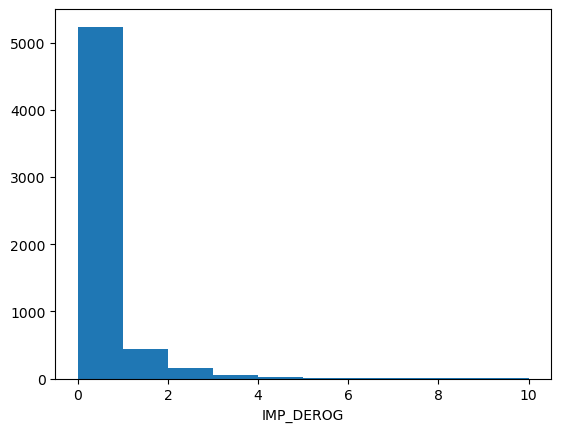

M_DELINQ


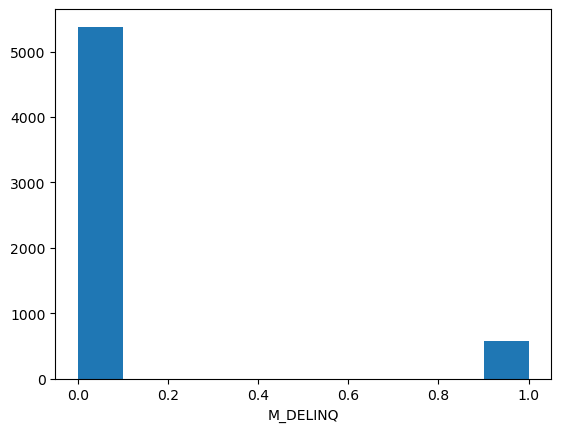

IMP_DELINQ


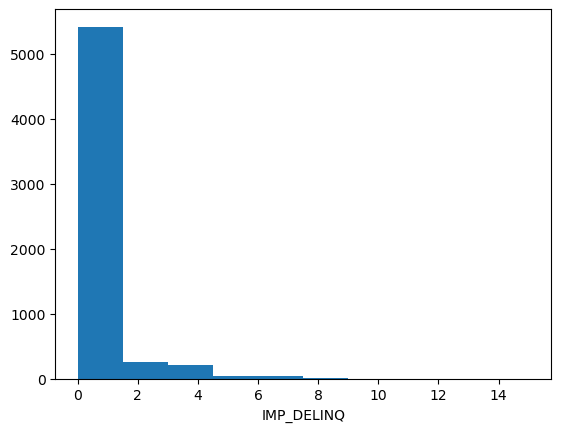

M_CLAGE


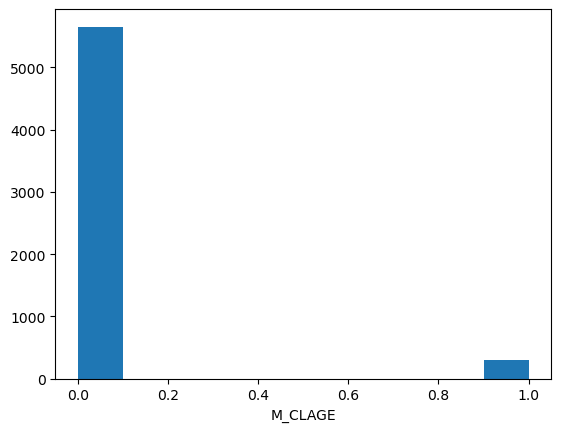

IMP_CLAGE


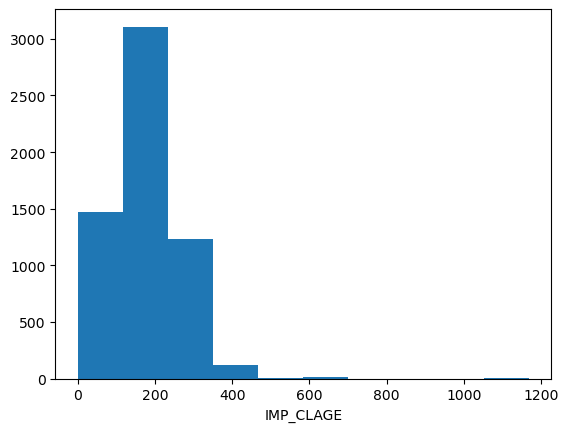

M_NINQ


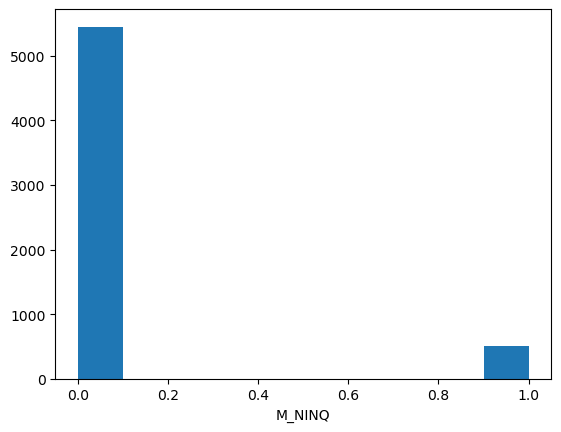

IMP_NINQ


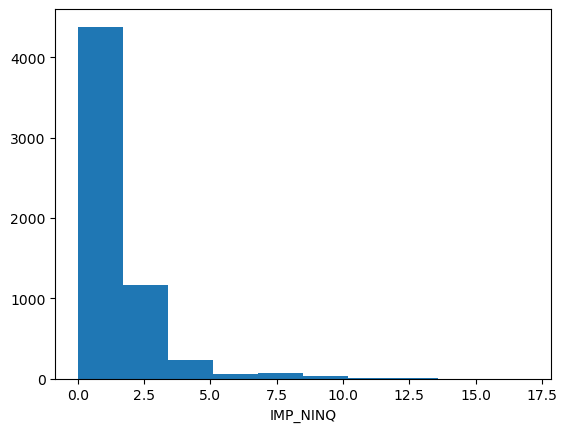

M_CLNO


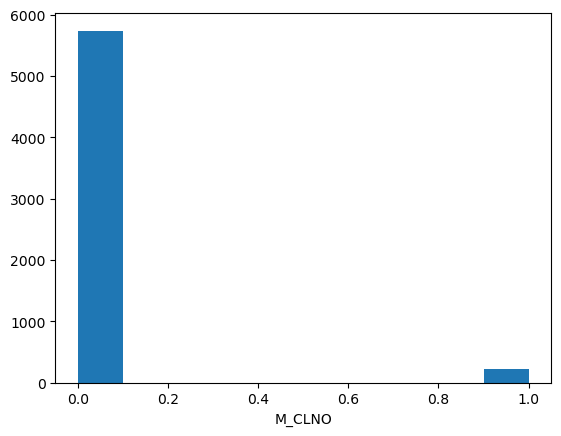

IMP_CLNO


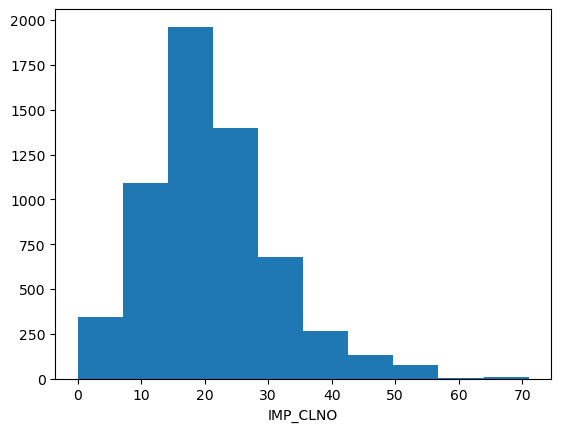

M_DEBTINC


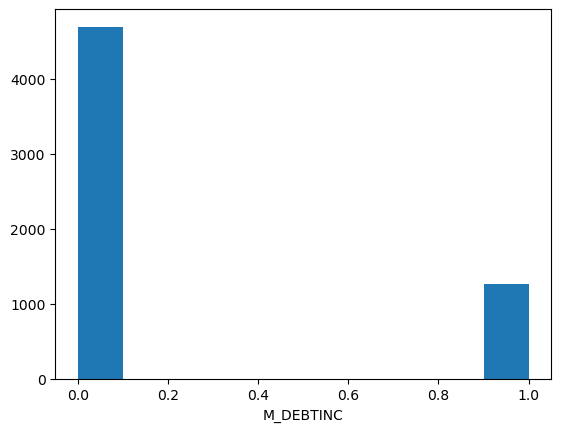

IMP_DEBTINC


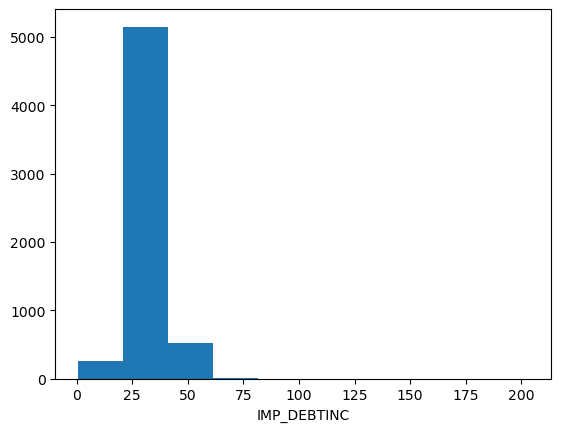

NameError: name 'df' is not defined

In [19]:
# split by data type and print out variables 
dt = cleandf01.dtypes
numList = []
for i in dt.index :
    #print(i, dt[i])
    if i in ( [ FLAG, LOSS ] ) : continue
    if dt[i] in (["float64","int64"]) : numList.append( i )

for i in numList:
    print(i)


# %%
print(" number ")
print(" ----- ")
for i in numList: 
    print( cleandf01[i]. describe() )
    print( " -------\n ")

# %%
for i in numList :
    print( i )
    plt.hist ( cleandf01[ i ])
    plt.xlabel ( i )
    plt.show()


for i in numList :
    theMean = df[i].mean()
    theSD = df[i].std()
    theMax = df[i].max()
    theCutoff = round( theMean + 3*theSD )
    if theMax < theCutoff : continue
    #flag if you fixed an outlier
    FLAG = "O_" + i
    TRUNC = "TRUNC_" + i
    df[ FLAG ] = ( cleandf01[i] > theCutoff )+ 0
    df[ TRUNC ] = df[ i ]
    df.loc[ df[TRUNC] > theCutoff, TRUNC ] = theCutoff
    df = df.drop( i, axis=1 )


dt = df.dtypes
numList = []
for i in dt.index :
    if i in ( [ FLAG, LOSS ] ) : continue
    if dt[i] in (["float64","int64"]) : numList.append( i )

for i in numList:
    print(i)

# %%
print(" number ")
print(" ----- ")
for i in numList: 
    print( cleandf01[i]. describe() )
    print( " -------\n ")

# %%
for i in numList :
    print( i )
    plt.hist ( cleandf01[ i ])
    plt.xlabel ( i )
    plt.show()


In [20]:
def getProbAccuracyScores( NAME, MODEL, X, Y ) :
    pred = MODEL.predict( X )
    probs = MODEL.predict_proba( X )
    acc_score = metrics.accuracy_score(Y, pred)
    p1 = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve( Y, p1)
    auc = metrics.auc(fpr,tpr)
    return [NAME, acc_score, fpr, tpr, auc]

def print_ROC_Curve( TITLE, LIST ) :
    fig = plt.figure(figsize=(6,4))
    plt.title( TITLE )
    for theResults in LIST :
        NAME = theResults[0]
        fpr = theResults[2]
        tpr = theResults[3]
        auc = theResults[4]
        theLabel = "AUC " + NAME + ' %0.2f' % auc
        plt.plot(fpr, tpr, label = theLabel )
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()


def print_Accuracy( TITLE, LIST ) :
    print( TITLE )
    print( "======" )
    for theResults in LIST :
        NAME = theResults[0]
        ACC = theResults[1]
        print( NAME, " = ", ACC )
    print( "------\n\n" )

def getAmtAccuracyScores( NAME, MODEL, X, Y ) :
    pred = MODEL.predict( X )
    MEAN = Y.mean()
    RMSE = math.sqrt( metrics.mean_squared_error( Y, pred))
    return [NAME, RMSE, MEAN]



C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Anaconda\Lib\site-packages

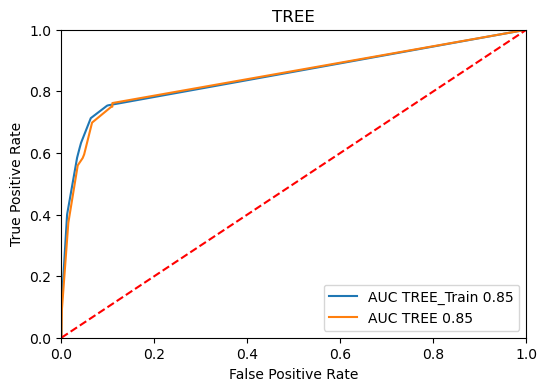

TREE CLASSIFICATION ACCURACY
TREE_Train  =  0.8938758389261745
TREE  =  0.8758389261744967
------


 CLASSIFICATION ACCURACY 
TREE_Train  =  0.8938758389261745
TREE  =  0.8758389261744967
------




In [21]:
WHO = "TREE"

CLM = tree.DecisionTreeClassifier( max_depth=4 )
CLM = CLM.fit( X_train, Y_train[ FLAG ] )

TRAIN_CLM = getProbAccuracyScores( WHO + "_Train", CLM, X_train, Y_train[ FLAG ] )
TEST_CLM = getProbAccuracyScores( WHO, CLM, X_test, Y_test[ FLAG ] )

print_ROC_Curve( WHO, [ TRAIN_CLM, TEST_CLM ] ) 
print_Accuracy( WHO + " CLASSIFICATION ACCURACY", [ TRAIN_CLM, TEST_CLM ] )

feature_cols = list( X.columns.values )
tree.export_graphviz(CLM,out_file='tree_f.txt',filled=True, rounded=True, feature_names = feature_cols, impurity=False, class_names=["Good","Bad"]  )
vars_tree_flag = getTreeVars( CLM, feature_cols ) 


print_Accuracy( " CLASSIFICATION ACCURACY ", [TRAIN_CLM, TEST_CLM])



feature_cols = list( X.columns.values )
tree.export_graphviz(CLM,out_file='NEWtree_f.txt',filled=True, rounded=True, feature_names = feature_cols, impurity=False, class_names=["Good","Bad"]  )
vars_tree_flag = getTreeVars( CLM, feature_cols)



In [22]:
AMT = tree.DecisionTreeRegressor( max_depth= 4 )
AMT = AMT.fit( W_train, Z_train[LOSS] )

TRAIN_AMT = getAmtAccuracyScores( WHO + "_Train", AMT, W_train, Z_train[LOSS] )
TEST_AMT = getAmtAccuracyScores( WHO, AMT, W_test, Z_test[LOSS] )
#print_Accuracy( WHO + " RMSE ACCURACY", [ TRAIN_AMT, TEST_AMT ] )

feature_cols = list( X.columns.values )
vars_tree_amt = getTreeVars( AMT, feature_cols ) 
tree.export_graphviz(AMT,out_file='tree_a.txt',filled=True, rounded=True, feature_names = feature_cols, impurity=False, precision=0  )


TREE_CLM = TEST_CLM.copy()
TREE_AMT = TEST_AMT.copy()


C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Anaconda\Lib\site-packages

In [23]:
def getEnsembleTreeVars( ENSTREE, varNames ) :
    importance = ENSTREE.feature_importances_
    index = np.argsort(importance)
    theList = []
    for i in index :
        imp_val = importance[i]
        if imp_val > np.average( ENSTREE.feature_importances_ ) :
            v = int( imp_val / np.max( ENSTREE.feature_importances_ ) * 100 )
            theList.append( ( varNames[i], v ) )
    theList = sorted(theList,key=itemgetter(1),reverse=True)
    return theList


C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Anaconda\Lib\site-packages

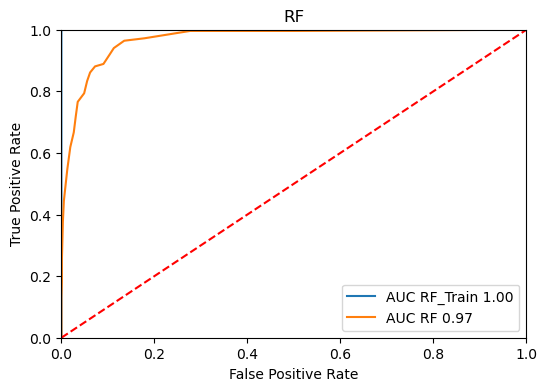

RF CLASSIFICATION ACCURACY
RF_Train  =  0.9989513422818792
RF  =  0.9161073825503355
------




In [24]:
WHO = "RF"

CLM = RandomForestClassifier( n_estimators = 25, random_state=1 )
CLM = CLM.fit( X_train, Y_train[ FLAG ] )

TRAIN_CLM = getProbAccuracyScores( WHO + "_Train", CLM, X_train, Y_train[ FLAG ] )
TEST_CLM = getProbAccuracyScores( WHO, CLM, X_test, Y_test[ FLAG ] )

print_ROC_Curve( WHO, [ TRAIN_CLM, TEST_CLM ] ) 
print_Accuracy( WHO + " CLASSIFICATION ACCURACY", [ TRAIN_CLM, TEST_CLM ] )


feature_cols = list( X.columns.values )
vars_RF_flag = getEnsembleTreeVars( CLM, feature_cols )

In [25]:
AMT = RandomForestRegressor(n_estimators = 100, random_state=1)
AMT = AMT.fit( W_train, Z_train[LOSS] )

TRAIN_AMT = getAmtAccuracyScores( WHO + "_Train", AMT, W_train, Z_train[LOSS] )
TEST_AMT = getAmtAccuracyScores( WHO, AMT, W_test, Z_test[LOSS] )
print_Accuracy( WHO + " RMSE ACCURACY", [ TRAIN_AMT, TEST_AMT ] )

feature_cols = list( X.columns.values )
vars_RF_amt = getEnsembleTreeVars( AMT, feature_cols )

for i in vars_RF_amt :
   print( i )

RF_CLM = TEST_CLM.copy()
RF_AMT = TEST_AMT.copy()

C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Anaconda\Lib\site-packages

RF RMSE ACCURACY
RF_Train  =  1088.349533081416
RF  =  3028.8246823918666
------


('Unnamed: 0', 100)
('M_DEBTINC', 88)
('IMP_DELINQ', 42)
('IMP_DEBTINC', 36)
('IMP_CLAGE', 27)
('IMP_CLNO', 21)
('LOAN', 18)
('IMP_YOJ', 17)
('IMP_VALUE', 16)


C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Anaconda\Lib\site-packages

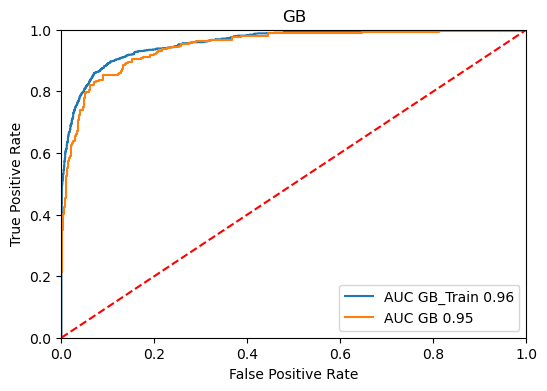

GB CLASSIFICATION ACCURACY
GB_Train  =  0.9238674496644296
GB  =  0.9043624161073825
------




In [26]:
WHO = "GB"

CLM = GradientBoostingClassifier( random_state=1 )
CLM = CLM.fit( X_train, Y_train[ FLAG ] )

TRAIN_CLM = getProbAccuracyScores( WHO + "_Train", CLM, X_train, Y_train[ FLAG ] )
TEST_CLM = getProbAccuracyScores( WHO, CLM, X_test, Y_test[ FLAG] )

print_ROC_Curve( WHO, [ TRAIN_CLM, TEST_CLM ] ) 
print_Accuracy( WHO + " CLASSIFICATION ACCURACY", [ TRAIN_CLM, TEST_CLM ] )


feature_cols = list( X.columns.values )
vars_GB_flag = getEnsembleTreeVars( CLM, feature_cols )

In [27]:
AMT = GradientBoostingRegressor(random_state=1)
AMT = AMT.fit( W_train, Z_train[LOSS] )

TRAIN_AMT = getAmtAccuracyScores( WHO + "_Train", AMT, W_train, Z_train[LOSS] )
TEST_AMT = getAmtAccuracyScores( WHO, AMT, W_test, Z_test[LOSS] )
print_Accuracy( WHO + " RMSE ACCURACY", [ TRAIN_AMT, TEST_AMT ] )

feature_cols = list( X.columns.values )
vars_GB_amt = getEnsembleTreeVars( AMT, feature_cols )

for i in vars_GB_amt :
   print( i )

GB_CLM = TEST_CLM.copy()
GB_AMT = TEST_AMT.copy()

C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Anaconda\Lib\site-packages

GB RMSE ACCURACY
GB_Train  =  2459.2177229508015
GB  =  3077.494290676056
------


('M_DEBTINC', 100)
('Unnamed: 0', 96)
('IMP_DELINQ', 49)
('IMP_DEBTINC', 35)
('IMP_CLAGE', 14)


C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Anaconda\Lib\site-packages

# **Assignment 3**

### **All Variables**

C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Anaconda\Lib\site-packages

REG_ALL RMSE ACCURACY
REG_ALL_Train  =  0.8921979865771812
REG_ALL  =  0.8800335570469798
------




C:\Anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Anaconda\Lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(

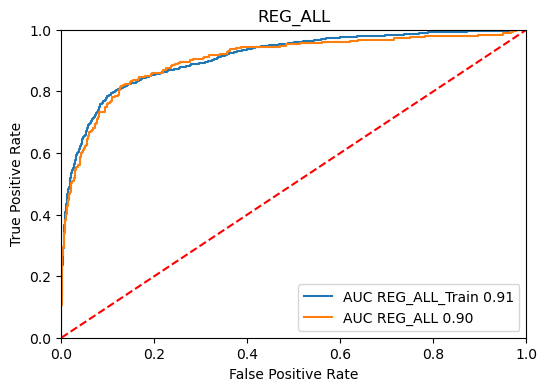

REG_ALL CLASSIFICATION ACCURACY
REG_ALL_Train  =  0.8921979865771812
REG_ALL  =  0.8800335570469798
------


REG_ALL RMSE ACCURACY
REG_ALL_Train  =  3601.7915263925374
REG_ALL  =  4027.4426338655644
------



FLAG
---------
Total Variables:  29
INTERCEPT  =  -5.190123933801141
Unnamed: 0  =  -9.023917701461724e-05
LOAN  =  2.644250838520206e-07
OHE_REASON_HOMEIMP  =  0.16012604531019642
OHE_REASON_DEBTCON  =  0.07057191417150435
OHE_REASON_MISSING  =  -0.40086156384585575
OHE_JOB_OFFICE  =  -0.5587927304346729
OHE_JOB_OTHER  =  0.37817879341891464
OHE_JOB_MGR  =  0.14830410464218005
OHE_JOB_PROFEXEC  =  0.0
OHE_JOB_SALES  =  1.016373994357113
M_MORTDUE  =  0.638426870065298
IMP_MORTDUE  =  -4.074168812569746e-06
M_VALUE  =  3.825199381934274
IMP_VALUE  =  5.255675350724396e-06
M_YOJ  =  -0.7919740443745859
IMP_YOJ  =  -0.01715012793946131
M_DEROG  =  -1.7995863674374848
IMP_DEROG  =  0.5022502150266956
M_DELINQ  =  -0.4663147873583735
IMP_DELINQ  =  0.7799510037315894
M_CLAGE  =  1.255

C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Anaconda\Lib\site-packages

In [28]:

def getCoefLogit( MODEL, TRAIN_DATA ) :
    varNames = list( TRAIN_DATA.columns.values )
    coef_dict = {}
    coef_dict["INTERCEPT"] = MODEL.intercept_[0]
    for coef, feat in zip(MODEL.coef_[0],varNames):
        coef_dict[feat] = coef
    print("\nFLAG")
    print("---------")
    print("Total Variables: ", len( coef_dict ) )
    for i in coef_dict :
        print( i, " = ", coef_dict[i]  )


WHO = "REG_ALL"

CLM = LogisticRegression( solver='newton-cg', max_iter=1000 )
CLM = CLM.fit( X_train, Y_train[ FLAG ] )

TRAIN_CLM = getProbAccuracyScores( WHO + "_Train", CLM, X_train, Y_train[ FLAG ] )
TEST_CLM = getProbAccuracyScores( WHO, CLM, X_test, Y_test[ FLAG ] )

print_Accuracy( WHO + " RMSE ACCURACY", [ TRAIN_CLM, TEST_CLM ] )

print_ROC_Curve( WHO, [ TRAIN_CLM, TEST_CLM ] ) 
print_Accuracy( WHO + " CLASSIFICATION ACCURACY", [ TRAIN_CLM, TEST_CLM ] )

#LOSS Regression

def getCoefLinear( MODEL, TRAIN_DATA ) :
    varNames = list( TRAIN_DATA.columns.values )
    coef_dict = {}
    coef_dict["INTERCEPT"] = MODEL.intercept_
    for coef, feat in zip(MODEL.coef_,varNames):
        coef_dict[feat] = coef
    print("\nLOSS")
    print("---------")
    print("Total Variables: ", len( coef_dict ) )
    for i in coef_dict :
        print( i, " = ", coef_dict[i]  )

AMT = LinearRegression()
AMT = AMT.fit( W_train, Z_train[LOSS] )

TRAIN_AMT = getAmtAccuracyScores( WHO + "_Train", AMT, W_train, Z_train[LOSS] )
TEST_AMT = getAmtAccuracyScores( WHO, AMT, W_test, Z_test[LOSS] )
print_Accuracy( WHO + " RMSE ACCURACY", [ TRAIN_AMT, TEST_AMT ] )


varNames = list( X_train.columns.values )

REG_ALL_CLM_COEF = getCoefLogit( CLM, X_train )
REG_ALL_AMT_COEF = getCoefLinear( AMT, X_train )

REG_ALL_CLM = TEST_CLM.copy()
REG_ALL_AMT = TEST_AMT.copy()

#### **Decision Tree**

C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Anaconda\Lib\site-packages

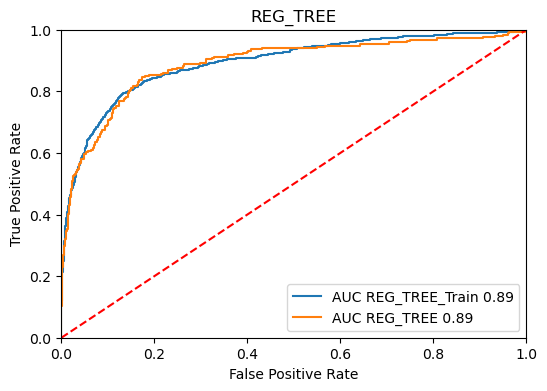

REG_TREE CLASSIFICATION ACCURACY
REG_TREE_Train  =  0.8810822147651006
REG_TREE  =  0.8758389261744967
------




In [29]:
WHO = "REG_TREE"
CLM = LogisticRegression( solver='newton-cg', max_iter=1000 )
CLM = CLM.fit( X_train[vars_tree_flag], Y_train[ FLAG ] )

TRAIN_CLM = getProbAccuracyScores( WHO + "_Train", CLM, X_train[vars_tree_flag], Y_train[ FLAG ] )
TEST_CLM = getProbAccuracyScores( WHO, CLM, X_test[vars_tree_flag], Y_test[ FLAG ] )

print_ROC_Curve( WHO, [ TRAIN_CLM, TEST_CLM ] ) 
print_Accuracy( WHO + " CLASSIFICATION ACCURACY", [ TRAIN_CLM, TEST_CLM ] )

In [30]:
def getCoefLinear( MODEL, TRAIN_DATA ) :
    varNames = list( TRAIN_DATA.columns.values )
    coef_dict = {}
    coef_dict["INTERCEPT"] = MODEL.intercept_
    for coef, feat in zip(MODEL.coef_,varNames):
        coef_dict[feat] = coef
    print("\nLOSS")
    print("---------")
    print("Total Variables: ", len( coef_dict ) )
    for i in coef_dict :
        print( i, " = ", coef_dict[i]  )
        
AMT = LinearRegression()
AMT = AMT.fit( W_train[vars_tree_amt], Z_train[LOSS] )

TRAIN_AMT = getAmtAccuracyScores( WHO + "_Train", AMT, W_train[vars_tree_amt], Z_train[LOSS] )
TEST_AMT = getAmtAccuracyScores( WHO, AMT, W_test[vars_tree_amt], Z_test[LOSS] )
print_Accuracy( WHO + " RMSE ACCURACY", [ TRAIN_AMT, TEST_AMT ] )


varNames = list( X_train.columns.values )

REG_TREE_CLM_COEF = getCoefLogit( CLM, X_train[vars_tree_flag] )
REG_TREE_AMT_COEF = getCoefLinear( AMT, X_train[vars_tree_amt] )

REG_TREE_CLM = TEST_CLM.copy()
REG_TREE_AMT = TEST_AMT.copy()

REG_TREE RMSE ACCURACY
REG_TREE_Train  =  3759.853229035658
REG_TREE  =  4255.587745569308
------



FLAG
---------
Total Variables:  12
INTERCEPT  =  -4.3710091758937715
Unnamed: 0  =  -9.720209082363904e-05
OHE_REASON_DEBTCON  =  -0.11657752780887069
M_VALUE  =  3.823609039270305
IMP_VALUE  =  1.8067645426453738e-06
M_YOJ  =  -0.2176274366910939
IMP_YOJ  =  -0.016790107817484756
M_DEROG  =  -1.0926703203441932
IMP_DELINQ  =  0.6982575732604428
IMP_CLAGE  =  -0.006825223535280206
M_DEBTINC  =  2.707898785276358
IMP_DEBTINC  =  0.08976143202409416

LOSS
---------
Total Variables:  7
INTERCEPT  =  -1014.6236068640528
Unnamed: 0  =  0.6737709230349826
M_VALUE  =  4835.061967120575
IMP_YOJ  =  -38.9242113181795
IMP_DELINQ  =  1317.2657328437726
M_DEBTINC  =  4666.367629808234
IMP_DEBTINC  =  75.08896501853488


C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Anaconda\Lib\site-packages

In [31]:
#variales tree liked
def getTreeVars( TREE, varNames ) :
    tree_ = TREE.tree_
    varName = [ varNames[i] if i != _tree.TREE_UNDEFINED else "undefined!" for i in tree_.feature ]
    nameSet = set()
    for i in tree_.feature :
        if i != _tree.TREE_UNDEFINED :
            nameSet.add( i )
    nameList = list( nameSet )
    parameter_list = list()
    for i in nameList :
        parameter_list.append( varNames[i] )
    return parameter_list

theTree = tree.DecisionTreeRegressor( max_depth=4 )
theTree = theTree.fit( X, Y )
treeList = getTreeVars( theTree, varNames )
print( treeList )

['Unnamed: 0', 'LOAN', 'OHE_REASON_HOMEIMP', 'IMP_DELINQ', 'IMP_CLNO', 'M_DEBTINC', 'IMP_DEBTINC']


C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.appl

#### **Random Forest**




('M_DEBTINC', 100)
('IMP_DEBTINC', 67)
('IMP_CLAGE', 39)
('Unnamed: 0', 36)
('IMP_VALUE', 35)
('IMP_DELINQ', 34)
('IMP_MORTDUE', 30)
('IMP_CLNO', 30)
('LOAN', 28)
('IMP_YOJ', 28)
('IMP_DEROG', 20)



('Unnamed: 0', 100)
('M_DEBTINC', 88)
('IMP_DELINQ', 42)
('IMP_DEBTINC', 36)
('IMP_CLAGE', 27)
('IMP_CLNO', 21)
('LOAN', 18)
('IMP_YOJ', 17)
('IMP_VALUE', 16)


C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Anaconda\Lib\site-packages

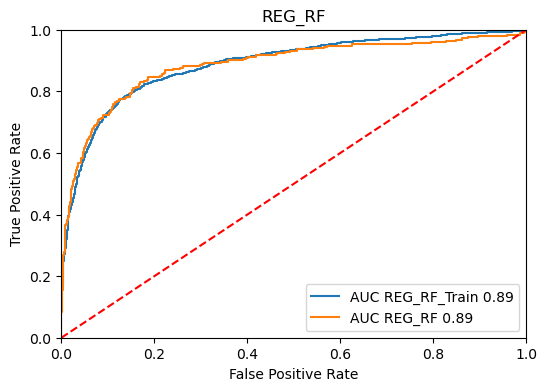

REG_RF CLASSIFICATION ACCURACY
REG_RF_Train  =  0.8787751677852349
REG_RF  =  0.8791946308724832
------


REG_RF RMSE ACCURACY
REG_RF_Train  =  3750.5264047462247
REG_RF  =  4243.440594173769
------



FLAG
---------
Total Variables:  12
INTERCEPT  =  -4.392549443183269
M_DEBTINC  =  2.688930576572396
IMP_DEBTINC  =  0.08739169628907334
IMP_CLAGE  =  -0.006264728999336975
Unnamed: 0  =  -0.00012446737013276129
IMP_VALUE  =  3.4001239991402854e-06
IMP_DELINQ  =  0.6769359725750468
IMP_MORTDUE  =  -1.8292220328297455e-06
IMP_CLNO  =  -0.01598774412526034
LOAN  =  6.274611448792196e-06
IMP_YOJ  =  -0.012627095417096638
IMP_DEROG  =  0.5672681350898557

LOSS
---------
Total Variables:  10
INTERCEPT  =  -353.2208186352291
Unnamed: 0  =  0.6256612053459132
M_DEBTINC  =  4804.654330748237
IMP_DELINQ  =  1362.1435271686005
IMP_DEBTINC  =  57.909620389983566
IMP_CLAGE  =  -7.789998440263391
IMP_CLNO  =  44.52322420850178
LOAN  =  0.005060644458902436
IMP_YOJ  =  -23.15364318339695
IMP_VALUE  = 

C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Anaconda\Lib\site-packages

In [32]:
WHO = "REG_RF"


print("\n\n")
RF_flag = []
for i in vars_RF_flag :
    print(i)
    theVar = i[0]
    RF_flag.append( theVar )

print("\n\n")
RF_amt = []
for i in vars_RF_amt :
    print(i)
    theVar = i[0]
    RF_amt.append( theVar )


CLM = LogisticRegression( solver='newton-cg', max_iter=1000 )
CLM = CLM.fit( X_train[RF_flag], Y_train[ FLAG ] )

TRAIN_CLM = getProbAccuracyScores( WHO + "_Train", CLM, X_train[RF_flag], Y_train[ FLAG ] )
TEST_CLM = getProbAccuracyScores( WHO, CLM, X_test[RF_flag], Y_test[ FLAG ] )

print_ROC_Curve( WHO, [ TRAIN_CLM, TEST_CLM ] ) 
print_Accuracy( WHO + " CLASSIFICATION ACCURACY", [ TRAIN_CLM, TEST_CLM ] )

#Regression RF LOSS

AMT = LinearRegression()
AMT = AMT.fit( W_train[RF_amt], Z_train[LOSS] )

TRAIN_AMT = getAmtAccuracyScores( WHO + "_Train", AMT, W_train[RF_amt], Z_train[LOSS] )
TEST_AMT = getAmtAccuracyScores( WHO, AMT, W_test[RF_amt], Z_test[LOSS] )
print_Accuracy( WHO + " RMSE ACCURACY", [ TRAIN_AMT, TEST_AMT ] )


REG_RF_CLM_COEF = getCoefLogit( CLM, X_train[RF_flag] )
REG_RF_AMT_COEF = getCoefLinear( AMT, X_train[RF_amt] )

REG_RF_CLM = TEST_CLM.copy()
REG_RF_AMT = TEST_AMT.copy()

#### **Gradient Boosting**




('M_DEBTINC', 100)
('IMP_DEBTINC', 28)
('IMP_DELINQ', 19)
('IMP_CLAGE', 13)
('M_VALUE', 8)



('M_DEBTINC', 100)
('Unnamed: 0', 96)
('IMP_DELINQ', 49)
('IMP_DEBTINC', 35)
('IMP_CLAGE', 14)


C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Anaconda\Lib\site-packages

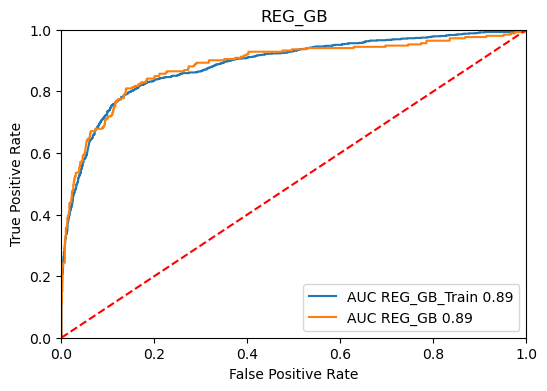

REG_GB CLASSIFICATION ACCURACY
REG_GB_Train  =  0.8777265100671141
REG_GB  =  0.875
------


REG_GB RMSE ACCURACY
REG_GB_Train  =  3785.3038693840167
REG_GB  =  4268.9622840948505
------



FLAG
---------
Total Variables:  6
INTERCEPT  =  -4.707484253851917
M_DEBTINC  =  2.741489086767893
IMP_DEBTINC  =  0.09000986719233049
IMP_DELINQ  =  0.671335888893428
IMP_CLAGE  =  -0.007409388193029288
M_VALUE  =  3.5037620029920555

LOSS
---------
Total Variables:  6
INTERCEPT  =  -118.01951714252664
M_DEBTINC  =  4788.329861408023
Unnamed: 0  =  0.7053980264295031
IMP_DELINQ  =  1421.2582721144836
IMP_DEBTINC  =  71.2673657001796
IMP_CLAGE  =  -6.612221209825448


C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Anaconda\Lib\site-packages

In [33]:
WHO = "REG_GB"


print("\n\n")
GB_flag = []
for i in vars_GB_flag :
    print(i)
    theVar = i[0]
    GB_flag.append( theVar )

print("\n\n")
GB_amt = []
for i in vars_GB_amt :
    print(i)
    theVar = i[0]
    GB_amt.append( theVar )


CLM = LogisticRegression( solver='newton-cg', max_iter=1000 )
CLM = CLM.fit( X_train[GB_flag], Y_train[ FLAG ] )

TRAIN_CLM = getProbAccuracyScores( WHO + "_Train", CLM, X_train[GB_flag], Y_train[ FLAG ] )
TEST_CLM = getProbAccuracyScores( WHO, CLM, X_test[GB_flag], Y_test[ FLAG ] )

print_ROC_Curve( WHO, [ TRAIN_CLM, TEST_CLM ] ) 
print_Accuracy( WHO + " CLASSIFICATION ACCURACY", [ TRAIN_CLM, TEST_CLM ] )

#Regression or GB LOSS


AMT = LinearRegression()
AMT = AMT.fit( W_train[GB_amt], Z_train[LOSS] )

TRAIN_AMT = getAmtAccuracyScores( WHO + "_Train", AMT, W_train[GB_amt], Z_train[LOSS] )
TEST_AMT = getAmtAccuracyScores( WHO, AMT, W_test[GB_amt], Z_test[LOSS] )
print_Accuracy( WHO + " RMSE ACCURACY", [ TRAIN_AMT, TEST_AMT ] )

REG_GB_CLM_COEF = getCoefLogit( CLM, X_train[GB_flag] )
REG_GB_AMT_COEF = getCoefLinear( AMT, X_train[GB_amt] )

REG_GB_CLM = TEST_CLM.copy()
REG_GB_AMT = TEST_AMT.copy()




#### **Stepwise Selection**

C:\Anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Anaconda\Lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search a

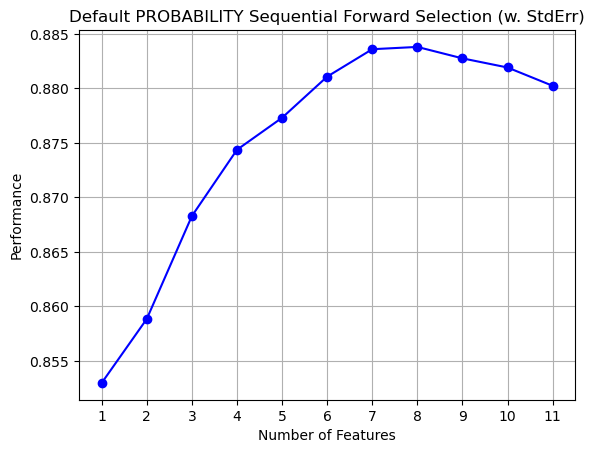

['feature_idx' 'cv_scores' 'avg_score' 'feature_names' 'ci_bound'
 'std_dev' 'std_err']


In [34]:
U_train = X_train[ vars_tree_flag ]
stepVarNames = list( U_train.columns.values )
maxCols = U_train.shape[1]

sfs = SFS( LogisticRegression( solver='newton-cg', max_iter=1000 ),
           k_features=( 1, maxCols ),
           forward=True,
           floating=False,
           cv=3
           )
sfs.fit(U_train.values, Y_train[ FLAG ].values)

theFigure = plot_sfs(sfs.get_metric_dict(), kind=None )
plt.title('Default PROBABILITY Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

#get metrics, what variables it liked and average error
dfm = pd.DataFrame.from_dict( sfs.get_metric_dict()).T
dfm_names = dfm.columns.values
print( dfm_names )
dfm = dfm[ ['feature_names', 'avg_score'] ]

In [35]:
dfm

,feature_names,avg_score
1,"(9,)",0.852976
2,"(8, 9)",0.858849
3,"(7, 8, 9)",0.868287
4,"(6, 7, 8, 9)",0.874369
5,"(2, 6, 7, 8, 9)",0.877305
6,"(0, 2, 6, 7, 8, 9)",0.88108
7,"(0, 2, 6, 7, 8, 9, 10)",0.883597
8,"(0, 2, 5, 6, 7, 8, 9, 10)",0.883807
9,"(0, 1, 2, 5, 6, 7, 8, 9, 10)",0.882758
10,"(0, 1, 2, 4, 5, 6, 7, 8, 9, 10)",0.881919


In [36]:
print(dfm.dtypes)
dfm.avg_score = dfm.avg_score.astype(float)
print(dfm.dtypes)
print(dfm)

feature_names    object
avg_score        object
dtype: object
feature_names     object
avg_score        float64
dtype: object
                         feature_names  avg_score
1                                 (9,)   0.852976
2                               (8, 9)   0.858849
3                            (7, 8, 9)   0.868287
4                         (6, 7, 8, 9)   0.874369
5                      (2, 6, 7, 8, 9)   0.877305
6                   (0, 2, 6, 7, 8, 9)   0.881080
7               (0, 2, 6, 7, 8, 9, 10)   0.883597
8            (0, 2, 5, 6, 7, 8, 9, 10)   0.883807
9         (0, 1, 2, 5, 6, 7, 8, 9, 10)   0.882758
10     (0, 1, 2, 4, 5, 6, 7, 8, 9, 10)   0.881919
11  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)   0.880241


In [37]:
def getVariables( DFM, INDEX, NAMES ) :
    theVars = DFM.iloc[ INDEX, ]
    theVars = theVars.feature_names
    print( INDEX,"=",theVars )
    theVarNames = []
    for i in theVars :
        index = int(i)
        try :
            theName = NAMES[ index ]
            theVarNames.append( theName )
        except :
            pass
    return theVarNames

print(" ................... ")

maxIndex = dfm.avg_score.argmax()
print( maxIndex )
regList = getVariables( dfm, maxIndex, varNames )
print( regList )

 ................... 
7
7 = ('0', '2', '5', '6', '7', '8', '9', '10')
['Unnamed: 0', 'OHE_REASON_HOMEIMP', 'OHE_JOB_OFFICE', 'OHE_JOB_OTHER', 'OHE_JOB_MGR', 'OHE_JOB_PROFEXEC', 'OHE_JOB_SALES', 'M_MORTDUE']


In [38]:
stepVars = dfm.iloc[ maxIndex, ]
stepVars = stepVars.feature_names
print( stepVars )

finalStepVars = []
for i in stepVars :
    index = int(i)
    try :
        theName = stepVarNames[ index ]
        finalStepVars.append( theName )
    except :
        pass

for i in finalStepVars :
    print(i)

U_train = X_train[ finalStepVars ]
U_test = X_test[ finalStepVars ]

('0', '2', '5', '6', '7', '8', '9', '10')
Unnamed: 0
M_VALUE
IMP_YOJ
M_DEROG
IMP_DELINQ
IMP_CLAGE
M_DEBTINC
IMP_DEBTINC


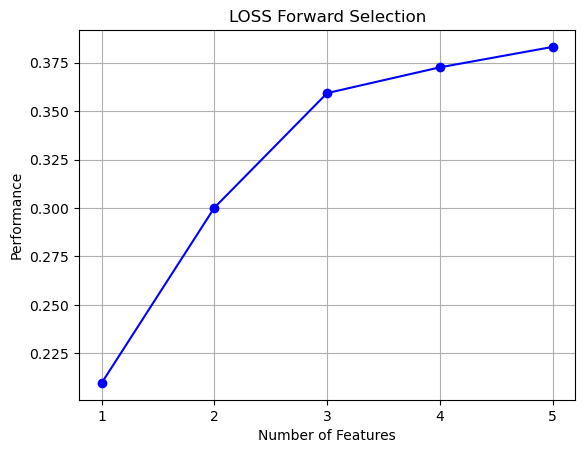

 ................... 
argmax
feature_names    (0, 1, 2, 3, 4)
avg_score               0.383097
Name: 5, dtype: object
 ................... 
('0', '1', '2', '3', '4')
M_DEBTINC
Unnamed: 0
IMP_DELINQ
IMP_DEBTINC
IMP_CLAGE


In [39]:
V_train = W_train[ GB_amt ]
stepVarNames = list( V_train.columns.values )
maxCols = V_train.shape[1]

sfs = SFS( LinearRegression(),
           k_features=( 1, maxCols ),
           forward=True,
           floating=False,
           scoring = 'r2',
           cv=5
           )
sfs.fit(V_train.values, Z_train[ LOSS ].values)

theFigure = plot_sfs(sfs.get_metric_dict(), kind=None )
plt.title('LOSS Forward Selection')
plt.grid()
plt.show()

dfm = pd.DataFrame.from_dict( sfs.get_metric_dict()).T
dfm = dfm[ ['feature_names', 'avg_score'] ]
dfm.avg_score = dfm.avg_score.astype(float)

print(" ................... ")
maxIndex = dfm.avg_score.argmax()
print("argmax")
print( dfm.iloc[ maxIndex, ] )
print(" ................... ")

stepVars = dfm.iloc[ maxIndex, ]
stepVars = stepVars.feature_names
print( stepVars )

finalStepVars = []
for i in stepVars :
    index = int(i)
    try :
        theName = stepVarNames[ index ]
        finalStepVars.append( theName )
    except :
        pass

for i in finalStepVars :
    print(i)

V_train = W_train[ finalStepVars ]
V_test = W_test[ finalStepVars ]

C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Anaconda\Lib\site-packages

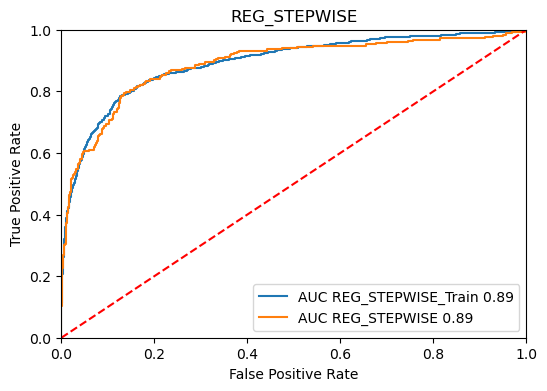

REG_STEPWISE CLASSIFICATION ACCURACY
REG_STEPWISE_Train  =  0.8835989932885906
REG_STEPWISE  =  0.8766778523489933
------


REG_STEPWISE RMSE ACCURACY
REG_STEPWISE_Train  =  6812.070410919788
REG_STEPWISE  =  0.32352692745474404
------



FLAG
---------
Total Variables:  9
INTERCEPT  =  -4.376431806795704
Unnamed: 0  =  -8.464655349794141e-05
M_VALUE  =  3.8101684103432487
IMP_YOJ  =  -0.016254062610190915
M_DEROG  =  -1.1229547159293254
IMP_DELINQ  =  0.6969253480197316
IMP_CLAGE  =  -0.006598194778120023
M_DEBTINC  =  2.7015794151364787
IMP_DEBTINC  =  0.0904819770385335

LOSS
---------
Total Variables:  6
INTERCEPT  =  -0.005665384437893661
M_DEBTINC  =  0.45498134355944436
Unnamed: 0  =  -8.073592141381869e-06
IMP_DELINQ  =  0.0897044535142702
IMP_DEBTINC  =  0.00594172912854751
IMP_CLAGE  =  -0.0006011069883731223


C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Anaconda\Lib\site-packages

In [40]:
WHO = "REG_STEPWISE"

CLM = LogisticRegression( solver='newton-cg', max_iter=1000 )
CLM = CLM.fit( U_train, Y_train[ FLAG ] )

TRAIN_CLM = getProbAccuracyScores( WHO + "_Train", CLM, U_train, Y_train[ FLAG ] )
TEST_CLM = getProbAccuracyScores( WHO, CLM, U_test, Y_test[ FLAG ] )

print_ROC_Curve( WHO, [ TRAIN_CLM, TEST_CLM ] ) 
print_Accuracy( WHO + " CLASSIFICATION ACCURACY", [ TRAIN_CLM, TEST_CLM ] )


# DAMAGES

AMT = LinearRegression()
AMT = AMT.fit( V_train, Z_train[FLAG] )

TRAIN_AMT = getAmtAccuracyScores( WHO + "_Train", AMT, V_train, Z_train[LOSS] )
TEST_AMT = getAmtAccuracyScores( WHO, AMT, V_test, Z_test[FLAG] )
print_Accuracy( WHO + " RMSE ACCURACY", [ TRAIN_AMT, TEST_AMT ] )

REG_STEP_CLM_COEF = getCoefLogit( CLM, U_train )
REG_STEP_AMT_COEF = getCoefLinear( AMT, V_train )

REG_STEP_CLM = TEST_CLM.copy()
REG_STEP_AMT = TEST_AMT.copy()

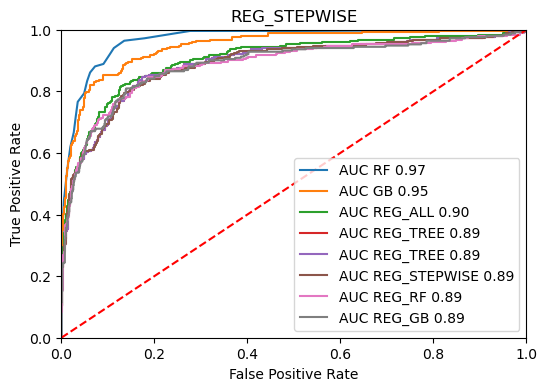

ALL FLAG ACCURACY
RF  =  0.9161073825503355
GB  =  0.9043624161073825
REG_ALL  =  0.8800335570469798
REG_RF  =  0.8791946308724832
REG_STEPWISE  =  0.8766778523489933
REG_TREE  =  0.8758389261744967
REG_TREE  =  0.8758389261744967
REG_GB  =  0.875
------


ALL LOSS ACCURACY
REG_STEPWISE  =  0.32352692745474404
RF  =  3028.8246823918666
GB  =  3077.494290676056
TREE  =  3897.663736539515
REG_ALL  =  4027.4426338655644
REG_RF  =  4243.440594173769
REG_TREE  =  4255.587745569308
REG_GB  =  4268.9622840948505
------




In [41]:
ALL_CLM = [ REG_TREE_CLM, RF_CLM, GB_CLM, REG_ALL_CLM, REG_TREE_CLM, REG_RF_CLM, REG_GB_CLM, REG_STEP_CLM ]

ALL_CLM = sorted( ALL_CLM, key = lambda x: x[4], reverse=True )
print_ROC_Curve( WHO, ALL_CLM ) 

ALL_CLM = sorted( ALL_CLM, key = lambda x: x[1], reverse=True )
print_Accuracy( "ALL FLAG ACCURACY", ALL_CLM )


ALL_AMT = [ TREE_AMT, RF_AMT, GB_AMT, REG_ALL_AMT, REG_TREE_AMT, REG_RF_AMT, REG_GB_AMT, REG_STEP_AMT ]
ALL_AMT = sorted( ALL_AMT, key = lambda x: x[1] )
print_Accuracy( "ALL LOSS ACCURACY", ALL_AMT )


# **Assignment 4**

In [70]:
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation, Flatten

from sklearn.preprocessing import StandardScaler

theScaler = StandardScaler()

from sklearn.preprocessing import MinMaxScaler

def get_TF_ProbAccuracyScores( NAME, MODEL, X, Y ) :
    probs = MODEL.predict( X )
    pred_list = []
    for p in probs :
        pred_list.append( np.argmax( p ) )
    pred = np.array( pred_list )
    acc_score = metrics.accuracy_score(Y, pred)
    p1 = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve( Y, p1)
    auc = metrics.auc(fpr,tpr)
    return [NAME, acc_score, fpr, tpr, auc]
    
def getTFAccuracyScores(NAME, MODEL, X, Y):
    pred = MODEL.predict(X)
    MEAN = Y.mean()
    RMSE = math.sqrt(metrics.mean_squared_error(Y, pred))
    return MEAN, RMSE


In [71]:
theScaler = StandardScaler()
theScaler.fit(X_train)

#data scaling - normalizes data to help improve performance and convergence speed of nueral network
U_train = theScaler.transform( X_train )
U_test = theScaler.transform( X_test )

#made into dataframes
U_train = pd.DataFrame( U_train )
U_test = pd.DataFrame( U_test )

#designate columns 
U_train.columns = list( X_train.columns.values )
U_test.columns = list( X_train.columns.values )

#make network
#input dimensions
F_theShapeSize = U_train.shape[1]
#activation function
F_theActivation = tf.keras.activations.softplus
#loss function
F_theLossMetric = tf.keras.losses.SparseCategoricalCrossentropy()
#optimizer used 
F_theOptimizer = tf.keras.optimizers.Adam()
#training epcohs
F_theEpochs = 100

#number of layers
F_theUnits = int( 2*F_theShapeSize / 3 )


F_LAYER_01 = tf.keras.layers.Dense( units=F_theUnits, activation=F_theActivation, input_dim=F_theShapeSize )
#dropout layer
F_LAYER_DROP = tf.keras.layers.Dropout( 0.2 )
F_LAYER_02 = tf.keras.layers.Dense( units=F_theUnits, activation=F_theActivation )
#output layer
F_LAYER_OUTPUT = tf.keras.layers.Dense( units=5, activation=tf.keras.activations.softmax )

C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.appl

149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
17/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Anaconda\Lib\site-packages\sklear

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Anaconda\Lib\site-packages\sklear

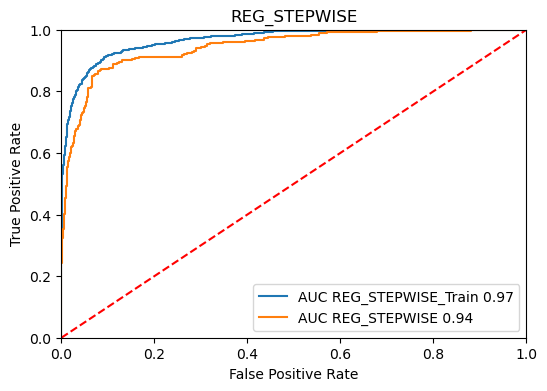

REG_STEPWISE CLASSIFICATION ACCURACY
REG_STEPWISE_Train  =  0.9318372483221476
REG_STEPWISE  =  0.9043624161073825
------




In [73]:
CLM = tf.keras.Sequential()
CLM.add( F_LAYER_01 )
CLM.add( F_LAYER_DROP )
CLM.add( F_LAYER_02 )
CLM.add( F_LAYER_OUTPUT )
CLM.compile( loss=F_theLossMetric, optimizer=F_theOptimizer)
CLM.fit( U_train, Y_train[FLAG], epochs=F_theEpochs, verbose=False )

TRAIN_CLM = get_TF_ProbAccuracyScores( WHO + "_Train", CLM, U_train, Y_train[ FLAG ] )
TEST_CLM = get_TF_ProbAccuracyScores( WHO, CLM, U_test, Y_test[ FLAG ] )

print_ROC_Curve( WHO, [ TRAIN_CLM, TEST_CLM ] ) 
print_Accuracy( WHO + " CLASSIFICATION ACCURACY", [ TRAIN_CLM, TEST_CLM ] )

In [74]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import math
from sklearn import metrics

#define model
AMT = Sequential()
AMT.add(Dense(128, input_shape=(5,), activation='relu'))  
AMT.add(Dense(64, activation='relu'))
AMT.add(Dropout(0.2))
AMT.add(Dense(1, activation='linear'))
AMT.compile(optimizer='adam', loss='mse')

#reshape
V_train_reshaped = V_train[GB_amt].to_numpy().reshape(-1, 5)  # Adjust the second dimension (5) as needed
V_test_reshaped = V_test[GB_amt].to_numpy().reshape(-1, 5)

#train
AMT.fit(V_train_reshaped, Z_train[LOSS], epochs=A_theEpochs, verbose=False)

#accuracy function
def getAmtAccuracyScores(NAME, MODEL, X, Y):
    pred = MODEL.predict(X)
    MEAN = Y.mean()
    RMSE = math.sqrt(metrics.mean_squared_error(Y, pred))
    return MEAN, RMSE

#eval model
TRAIN_AMT = getAmtAccuracyScores(WHO + "_Train", AMT, V_train_reshaped, Z_train[LOSS])
TEST_AMT = getAmtAccuracyScores(WHO, AMT, V_test_reshaped, Z_test[LOSS])

#print
print(f'Training RMSE: {TRAIN_AMT[1]}')
print(f'Test RMSE: {TEST_AMT[1]}')

TF_CLM = TEST_CLM.copy()
RMSE_TEST_AMT = TEST_AMT[1]
TF_AMT = RMSE_TEST_AMT  



C:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
23/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Training RMSE: 3524.265254500898
Test RMSE: 4045.470773273413


C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


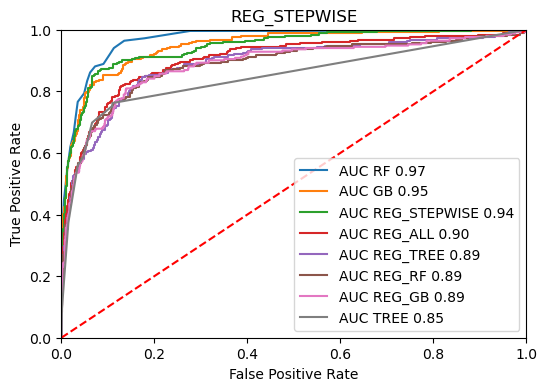

ALL CLASSIFICATION ACCURACY
RF  =  0.9161073825503355
GB  =  0.9043624161073825
REG_STEPWISE  =  0.9043624161073825
REG_ALL  =  0.8800335570469798
REG_RF  =  0.8791946308724832
REG_TREE  =  0.8758389261744967
TREE  =  0.8758389261744967
REG_GB  =  0.875
------


ALL DAMAGE MODEL ACCURACY
TREE  =  3897.663736539515
RF  =  3028.8246823918666
GB  =  3077.494290676056
REG_ALL  =  4027.4426338655644
REG_TREE  =  4255.587745569308
REG_RF  =  4243.440594173769
REG_GB  =  4268.9622840948505


TypeError: 'float' object is not subscriptable

In [75]:
ALL_CLM = [ TREE_CLM, RF_CLM, GB_CLM, REG_ALL_CLM, REG_TREE_CLM, REG_RF_CLM, REG_GB_CLM, TF_CLM ]

ALL_CLM = sorted( ALL_CLM, key = lambda x: x[4], reverse=True )
print_ROC_Curve( WHO, ALL_CLM ) 

ALL_CLM = sorted( ALL_CLM, key = lambda x: x[1], reverse=True )
print_Accuracy( "ALL CLASSIFICATION ACCURACY", ALL_CLM )



ALL_AMT = [ TREE_AMT, RF_AMT, GB_AMT, REG_ALL_AMT, REG_TREE_AMT, REG_RF_AMT, REG_GB_AMT, TF_AMT ]
print_Accuracy( "ALL DAMAGE MODEL ACCURACY", ALL_AMT )
